In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('E:/machine learning/carprices.csv')

In [3]:
dummy=pd.get_dummies(df.CarModel)

In [4]:
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
merge=pd.concat([df,dummy] ,axis='columns')

In [6]:
merge

,CarModel,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [7]:
new_df=merge.drop(['CarModel','Mercedez Benz C class'],axis='columns')

In [8]:
new_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


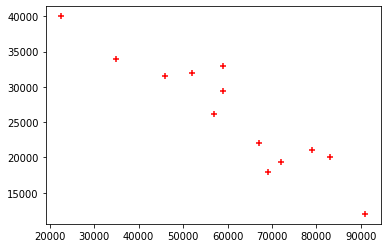

In [9]:
%matplotlib inline
plt.scatter(new_df['Mileage'],new_df['Sell Price($)'], color='red', marker='+')

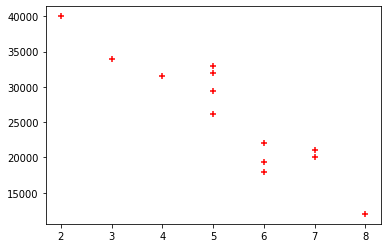

In [10]:
%matplotlib inline
plt.scatter(new_df['Age(yrs)'],new_df['Sell Price($)'], color='red', marker='+')

In [11]:
df

,CarModel,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
model=LinearRegression()

In [13]:
x=new_df.drop(['Sell Price($)'],axis='columns')

In [14]:
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [15]:
y=new_df['Sell Price($)']

In [16]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [17]:
model.fit(x,y)

LinearRegression()

In [18]:
model.predict([[75000,3,1,0]]) #predicts the selling price of an audi a5 which has mileage 75000 and has run for 3 years

array([24766.56726931])

In [19]:
model.predict([[50000,1,0,1]]) #predicts the selling price of a bmw x5 which has mileage 50000 and has run for 1 year

array([32399.86029584])

In [20]:
model.predict([[33000,5,0,0]]) #predicts the selling price of a mercedez benz c class which has mileage 33000 and has run for 5 years

array([40100.32871566])

In [21]:
model.predict([[11500,9,1,0]])

array([40274.5984973])

In [22]:
model.predict([[77071,5,0,0]])

array([23788.67789387])

In [23]:
model.predict([[25000,5,1,0]]) #predicts the selling price of an audi a5 which has mileage 25000 and has run for 5 years

array([40607.76473351])

In [24]:
model.predict([[55016,3,0,1]]) #predict the selling price of a bmw x5 which has mileage 55016 and has run for 3 years

array([27878.42061517])

In [25]:
model.score(x,y) #gives the accuracy of the model out of 1

0.9417050937281082

In [27]:
model.predict([[11000,3,0,1]])

array([44169.71472177])